Analysis of Striker Finishing Quality Using FBref/Opta Data (2023/24 Season, Top 5 Leagues)

In [1]:
# Imports and download data from fbref
import lxml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pull data and save

url = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

df_url = pd.read_html(url)[0]

df_url.head()


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1         Max Aarons            eng ENG                 DF   
1                  2   Brenden Aaronson             us USA              MF,FW   
2                  3    Paxten Aaronson             us USA                 MF   
3                  4  Keyliane Abdallah             fr FRA                 FW   
4                  5   Yunis Abdelhamid             ma MAR                 DF   

  Unnamed: 4_level_0  Unnamed: 5_level_0 Unnamed: 6_level_0  \
               Squad                Comp                Age   
0        Bournemouth  eng Premier League                 23   
1       Union Berlin       de Bundesliga                 22   
2     Eint Frankfurt       de Bundesliga                 19   
3          Marseille          fr Ligue 1                 17   
4              Reims          fr Ligue 1                 35   

  Unnamed: 7_level_0 Unnamed: 8_level_0 Standard  ...                    \
                Born                90s      Gls  ...  Dist FK PK PKatt   
0               2000               13.7        0  ...  23.9  0  0     0   
1               2000               14.1        2  ...  18.4  0  0     0   
2               2003                1.1        0  ...  15.1  0  0     0   
3               2006                0.0        0  ...   NaN  0  0     0   
4               1987               30.9        4  ...  15.0  0  1     1   

  Expected                            Unnamed: 26_level_0  
        xG npxG npxG/Sh  G-xG np:G-xG             Matches  
0      0.0  0.0    0.02   0.0     0.0             Matches  
1      2.0  2.0    0.11   0.0     0.0             Matches  
2      0.1  0.1    0.06  -0.1    -0.1             Matches  
3      0.0  0.0     NaN   0.0     0.0             Matches  
4      3.4  2.6    0.13  +0.6    +0.4             Matches  

[5 rows x 27 columns]

In [2]:
df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)        2966 non-null   object
 1   (Unnamed: 1_level_0, Player)    2966 non-null   object
 2   (Unnamed: 2_level_0, Nation)    2961 non-null   object
 3   (Unnamed: 3_level_0, Pos)       2966 non-null   object
 4   (Unnamed: 4_level_0, Squad)     2966 non-null   object
 5   (Unnamed: 5_level_0, Comp)      2966 non-null   object
 6   (Unnamed: 6_level_0, Age)       2961 non-null   object
 7   (Unnamed: 7_level_0, Born)      2961 non-null   object
 8   (Unnamed: 8_level_0, 90s)       2966 non-null   object
 9   (Standard, Gls)                 2966 non-null   object
 10  (Standard, Sh)                  2966 non-null   object
 11  (Standard, SoT)                 2966 non-null   object
 12  (Standard, SoT%)                2435 non-null   

In [3]:
# Begin cleaning

# Merge multi-columns
df = df_url.copy()
df.columns = [' '.join(col).strip() for col in df.columns]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0 Rk        2966 non-null   object
 1   Unnamed: 1_level_0 Player    2966 non-null   object
 2   Unnamed: 2_level_0 Nation    2961 non-null   object
 3   Unnamed: 3_level_0 Pos       2966 non-null   object
 4   Unnamed: 4_level_0 Squad     2966 non-null   object
 5   Unnamed: 5_level_0 Comp      2966 non-null   object
 6   Unnamed: 6_level_0 Age       2961 non-null   object
 7   Unnamed: 7_level_0 Born      2961 non-null   object
 8   Unnamed: 8_level_0 90s       2966 non-null   object
 9   Standard Gls                 2966 non-null   object
 10  Standard Sh                  2966 non-null   object
 11  Standard SoT                 2966 non-null   object
 12  Standard SoT%                2435 non-null   object
 13  Standard Sh/90               2966

,Unnamed: 0_level_0 Rk,Unnamed: 1_level_0 Player,Unnamed: 2_level_0 Nation,Unnamed: 3_level_0 Pos,Unnamed: 4_level_0 Squad,Unnamed: 5_level_0 Comp,Unnamed: 6_level_0 Age,Unnamed: 7_level_0 Born,Unnamed: 8_level_0 90s,Standard Gls,...,Standard Dist,Standard FK,Standard PK,Standard PKatt,Expected xG,Expected npxG,Expected npxG/Sh,Expected G-xG,Expected np:G-xG,Unnamed: 26_level_0 Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,13.7,0,...,23.9,0,0,0,0.0,0.0,0.02,0.0,0.0,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,14.1,2,...,18.4,0,0,0,2.0,2.0,0.11,0.0,0.0,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,1.1,0,...,15.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,0.0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,30.9,4,...,15.0,0,1,1,3.4,2.6,0.13,+0.6,+0.4,Matches


In [4]:
# Select desired columns
df.columns

df = df[['Unnamed: 1_level_0 Player', 'Unnamed: 2_level_0 Nation', 'Unnamed: 4_level_0 Squad',
       'Unnamed: 6_level_0 Age', 'Unnamed: 8_level_0 90s', 'Standard Gls', 'Standard PK',
       'Standard PKatt', 'Expected xG', 'Expected npxG', 'Expected npxG/Sh',
       'Expected G-xG', 'Expected np:G-xG']]

df.head(10)

,Unnamed: 1_level_0 Player,Unnamed: 2_level_0 Nation,Unnamed: 4_level_0 Squad,Unnamed: 6_level_0 Age,Unnamed: 8_level_0 90s,Standard Gls,Standard PK,Standard PKatt,Expected xG,Expected npxG,Expected npxG/Sh,Expected G-xG,Expected np:G-xG
0,Max Aarons,eng ENG,Bournemouth,23,13.7,0,0,0,0.0,0.0,0.02,0.0,0.0
1,Brenden Aaronson,us USA,Union Berlin,22,14.1,2,0,0,2.0,2.0,0.11,0.0,0.0
2,Paxten Aaronson,us USA,Eint Frankfurt,19,1.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
3,Keyliane Abdallah,fr FRA,Marseille,17,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,Yunis Abdelhamid,ma MAR,Reims,35,30.9,4,1,1,3.4,2.6,0.13,+0.6,+0.4
5,Salis Abdul Samed,gh GHA,Lens,23,16.9,0,0,0,0.8,0.8,0.17,-0.8,-0.8
6,Nabil Aberdin,fr FRA,Getafe,20,2.0,0,0,0,0.0,0.0,NaN,0.0,0.0
7,Laurent Abergel,fr FRA,Lorient,30,31.8,2,0,0,1.1,1.1,0.04,+0.9,+0.9
8,Matthis Abline,fr FRA,Nantes,20,11.6,5,0,0,3.8,3.8,0.09,+1.2,+1.2
9,Abner,br BRA,Betis,23,15.6,0,0,0,0.1,0.1,0.03,-0.1,-0.1


In [5]:
# Rename columns
new_columns = []
for col in df.columns:
    new_col = col.split()[-1]
    new_columns.append(new_col)
df.columns = new_columns

df = df.rename(columns={'npxG/Sh': 'npxG/sh', 'np:G-xG': 'npG-npxG', 'Gls': 'G'})

df.head(10)

,Player,Nation,Squad,Age,90s,G,PK,PKatt,xG,npxG,npxG/sh,G-xG,npG-npxG
0,Max Aarons,eng ENG,Bournemouth,23,13.7,0,0,0,0.0,0.0,0.02,0.0,0.0
1,Brenden Aaronson,us USA,Union Berlin,22,14.1,2,0,0,2.0,2.0,0.11,0.0,0.0
2,Paxten Aaronson,us USA,Eint Frankfurt,19,1.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
3,Keyliane Abdallah,fr FRA,Marseille,17,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,Yunis Abdelhamid,ma MAR,Reims,35,30.9,4,1,1,3.4,2.6,0.13,+0.6,+0.4
5,Salis Abdul Samed,gh GHA,Lens,23,16.9,0,0,0,0.8,0.8,0.17,-0.8,-0.8
6,Nabil Aberdin,fr FRA,Getafe,20,2.0,0,0,0,0.0,0.0,NaN,0.0,0.0
7,Laurent Abergel,fr FRA,Lorient,30,31.8,2,0,0,1.1,1.1,0.04,+0.9,+0.9
8,Matthis Abline,fr FRA,Nantes,20,11.6,5,0,0,3.8,3.8,0.09,+1.2,+1.2
9,Abner,br BRA,Betis,23,15.6,0,0,0,0.1,0.1,0.03,-0.1,-0.1


In [6]:
# Trim the 'Nation' column
df['Nation'] = df['Nation'].str.split().str.get(1)
df.head(10)

,Player,Nation,Squad,Age,90s,G,PK,PKatt,xG,npxG,npxG/sh,G-xG,npG-npxG
0,Max Aarons,ENG,Bournemouth,23,13.7,0,0,0,0.0,0.0,0.02,0.0,0.0
1,Brenden Aaronson,USA,Union Berlin,22,14.1,2,0,0,2.0,2.0,0.11,0.0,0.0
2,Paxten Aaronson,USA,Eint Frankfurt,19,1.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
3,Keyliane Abdallah,FRA,Marseille,17,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,Yunis Abdelhamid,MAR,Reims,35,30.9,4,1,1,3.4,2.6,0.13,+0.6,+0.4
5,Salis Abdul Samed,GHA,Lens,23,16.9,0,0,0,0.8,0.8,0.17,-0.8,-0.8
6,Nabil Aberdin,FRA,Getafe,20,2.0,0,0,0,0.0,0.0,NaN,0.0,0.0
7,Laurent Abergel,FRA,Lorient,30,31.8,2,0,0,1.1,1.1,0.04,+0.9,+0.9
8,Matthis Abline,FRA,Nantes,20,11.6,5,0,0,3.8,3.8,0.09,+1.2,+1.2
9,Abner,BRA,Betis,23,15.6,0,0,0,0.1,0.1,0.03,-0.1,-0.1


In [7]:
# Drop nulls
# this is safe in this case because prominent players will be sure to have all data fields filled
# (only prominent players are of concern for this analysis)
nulls_before = df.isna().sum()
df = df.dropna()
nulls_after = df.isna().sum()
print(nulls_before, nulls_after)
df = df.reset_index(drop=True)
df.head(10)

Player        0
Nation      119
Squad         0
Age           5
90s           0
G             0
PK            0
PKatt         0
xG            1
npxG          1
npxG/sh     531
G-xG          1
npG-npxG      1
dtype: int64 Player      0
Nation      0
Squad       0
Age         0
90s         0
G           0
PK          0
PKatt       0
xG          0
npxG        0
npxG/sh     0
G-xG        0
npG-npxG    0
dtype: int64


,Player,Nation,Squad,Age,90s,G,PK,PKatt,xG,npxG,npxG/sh,G-xG,npG-npxG
0,Max Aarons,ENG,Bournemouth,23,13.7,0,0,0,0.0,0.0,0.02,0.0,0.0
1,Brenden Aaronson,USA,Union Berlin,22,14.1,2,0,0,2.0,2.0,0.11,0.0,0.0
2,Paxten Aaronson,USA,Eint Frankfurt,19,1.1,0,0,0,0.1,0.1,0.06,-0.1,-0.1
3,Yunis Abdelhamid,MAR,Reims,35,30.9,4,1,1,3.4,2.6,0.13,+0.6,+0.4
4,Salis Abdul Samed,GHA,Lens,23,16.9,0,0,0,0.8,0.8,0.17,-0.8,-0.8
5,Laurent Abergel,FRA,Lorient,30,31.8,2,0,0,1.1,1.1,0.04,+0.9,+0.9
6,Matthis Abline,FRA,Nantes,20,11.6,5,0,0,3.8,3.8,0.09,+1.2,+1.2
7,Abner,BRA,Betis,23,15.6,0,0,0,0.1,0.1,0.03,-0.1,-0.1
8,Zakaria Aboukhlal,MAR,Toulouse,23,8.4,3,1,1,2.8,2.0,0.07,+0.2,0.0
9,Abdel Abqar,MAR,Alavés,24,25.7,0,0,0,0.5,0.5,0.05,-0.5,-0.5


In [8]:
# Update data types
df = df.astype({'Age': int, '90s': float, 'G': int, 'PK': int, 'PKatt': int, 'xG':float, 'npxG': float,
                'npxG/sh': float, 'G-xG': float, 'npG-npxG': float})

df.info()
# Data has been prepared

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    2319 non-null   object 
 1   Nation    2319 non-null   object 
 2   Squad     2319 non-null   object 
 3   Age       2319 non-null   int64  
 4   90s       2319 non-null   float64
 5   G         2319 non-null   int64  
 6   PK        2319 non-null   int64  
 7   PKatt     2319 non-null   int64  
 8   xG        2319 non-null   float64
 9   npxG      2319 non-null   float64
 10  npxG/sh   2319 non-null   float64
 11  G-xG      2319 non-null   float64
 12  npG-npxG  2319 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 235.6+ KB


In [9]:
# More exploring the data
df.head(10)
df.describe()
df.sort_values(by='npG-npxG', ascending=False).head(25)

,Player,Nation,Squad,Age,90s,G,PK,PKatt,xG,npxG,npxG/sh,G-xG,npG-npxG
2054,Alexander Sørloth,NOR,Villarreal,27,27.7,23,0,0,12.3,12.3,0.16,10.7,10.7
708,Phil Foden,ENG,Manchester City,23,31.7,19,0,0,10.3,10.3,0.10,8.7,8.7
226,Jude Bellingham,ENG,Real Madrid,20,25.7,19,1,1,11.1,10.3,0.17,7.9,7.7
1151,Alexandre Lacazette,FRA,Lyon,32,25.5,19,2,2,11.4,9.8,0.17,7.6,7.2
1340,Lautaro Martínez,ARG,Inter,25,29.5,24,2,3,17.6,15.3,0.15,6.4,6.7
1378,Kylian Mbappé,FRA,Paris S-G,24,24.0,27,6,8,21.0,14.5,0.13,6.0,6.5
859,Serhou Guirassy,GUI,Stuttgart,27,24.5,28,4,4,20.8,17.6,0.20,7.2,6.4
1955,Benjamin Šeško,SVN,RB Leipzig,20,17.0,14,0,0,7.7,7.7,0.16,6.3,6.3
878,Robin Hack,GER,Gladbach,24,15.0,10,0,0,3.9,3.9,0.09,6.1,6.1
575,Eren Dinkçi,GER,Heidenheim,21,29.4,10,0,0,4.3,4.3,0.09,5.7,5.7


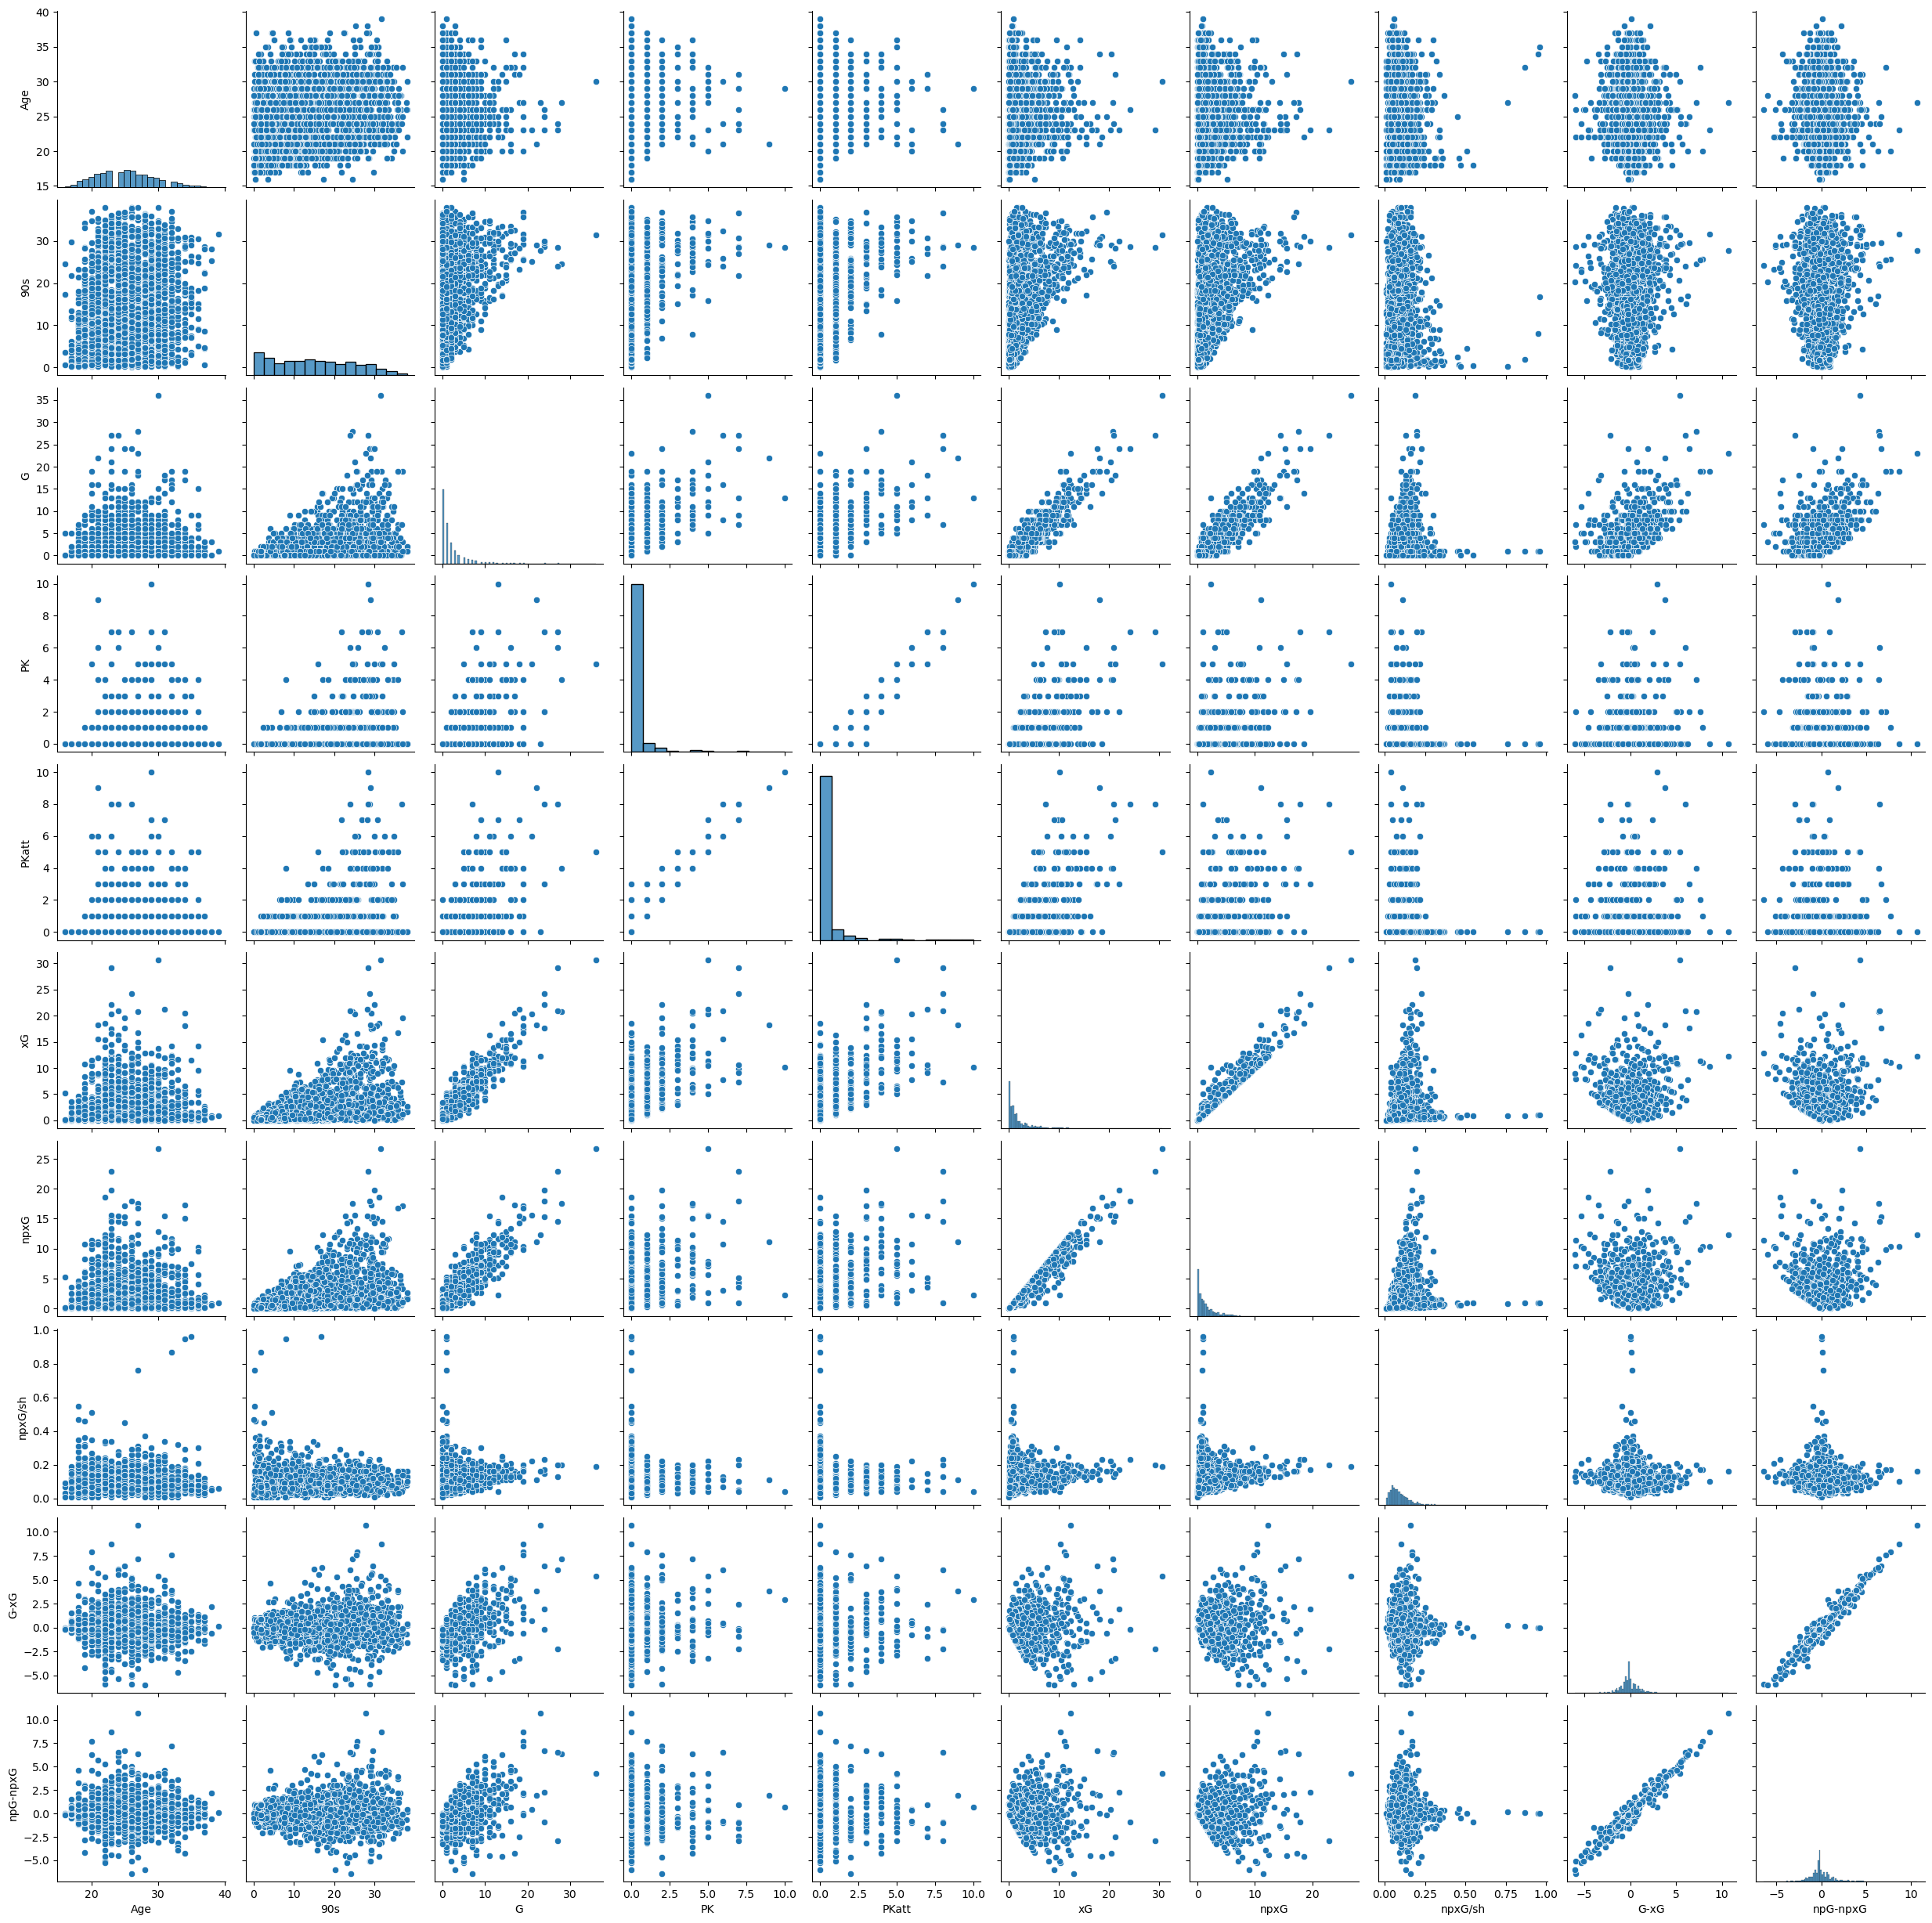

In [10]:
# Visualizations to explore the data
# Pairplot to quickly visualize all relationships
sns.pairplot(df)

<AxesSubplot:xlabel='npG-npxG', ylabel='Count'>

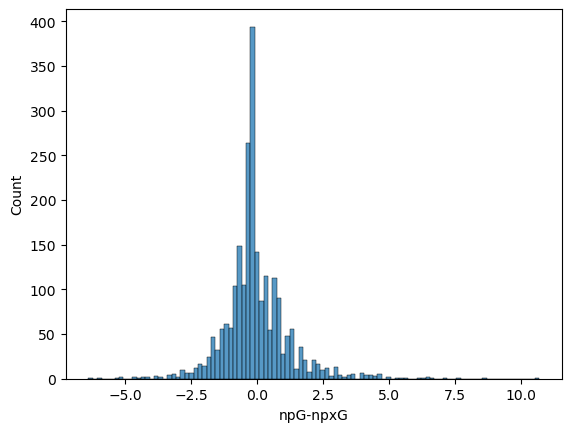

In [11]:
# Histograms to see distribution of values
sns.histplot(df['npG-npxG'])

In [12]:
# Above: some right-skew, most players' G closely reflects their xG.

<AxesSubplot:xlabel='G', ylabel='Count'>

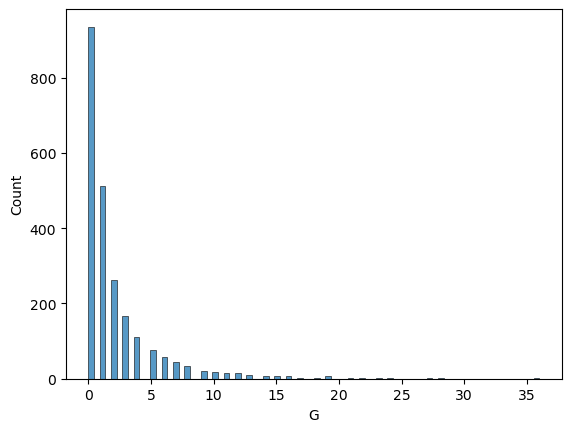

In [13]:
sns.histplot(df['G'])

In [14]:
# Above: most players don't score. Could potentially exclude a lower quantile of players from the analysis.

<AxesSubplot:xlabel='90s', ylabel='Count'>

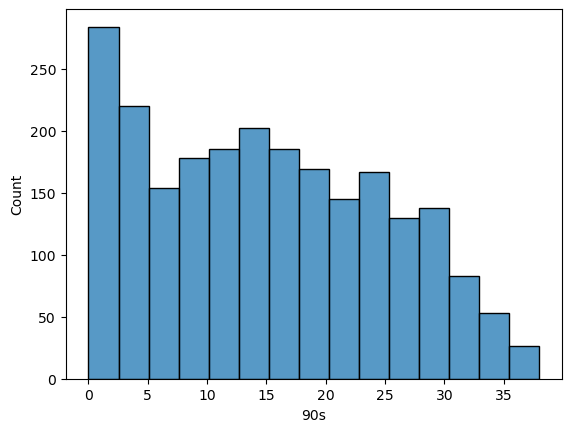

In [15]:
sns.histplot(df['90s'])

In [16]:
# Above: Significant numbers of players don't play full seasons' worth of games (~15+).
# Note: '90s' = total mins played / 90 (a full game is 90mins).
# Consider:
# --excluding those with few games/mins player from analysis
# --scaling other performance metrics to '90s' to account for lack of game time
# --investigating reasons for missed games
# ----injury record
# ----personality issues with current coach
# ----player wants to leave current club
# ----player is young and is being slowly integrated into senior team at current club

# Note that purpose would guide the answers to the above questions:
# 'scouting' (as a club would on the transfer market) vs. simple assessment of finishing quality of all players

mean PKatt for all players: 0.23717119448037946
mean PKatt for PK takers: 3.4916666666666667
mean G increase for PK takers: 2.925


<AxesSubplot:xlabel='90s', ylabel='npG-npxG'>

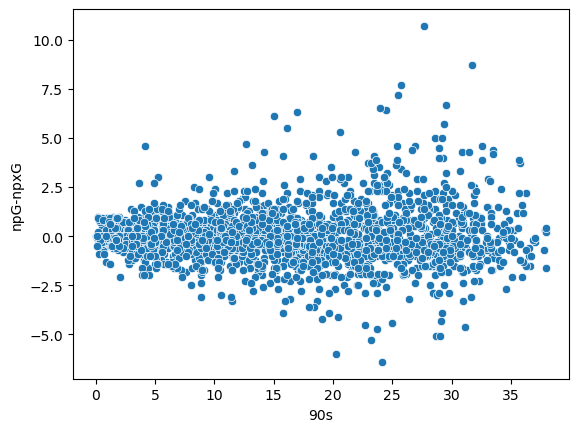

In [17]:
# Plot of key statistics:
# npG-npxG (excluding G-xG because PKs skew results, i.e. if a player is a team's PK taker, that player
# will finish a season with more goals, calculated below where PK_taker is player that has PKatt >= 2
PK_takers = df[['PK', 'PKatt']][df['PKatt'] > 1]
mean_PKatt_PK_takers = PK_takers['PKatt'].mean()
print('mean PKatt for all players: ' + str(df['PKatt'].mean()))
print('mean PKatt for PK takers: ' + str(mean_PKatt_PK_takers))
print('mean G increase for PK takers: ' + str((PK_takers.mean()['PK'] / PK_takers.mean()['PKatt'].mean()) * mean_PKatt_PK_takers))

# npG-npxG vs. 90s:
# Interested in those above y=0, and proportionally more interested as 90s increases
# i.e. top-right is good
sns.scatterplot(x=df['90s'], y=df['npG-npxG'])

<AxesSubplot:xlabel='npG-npxG/90', ylabel='Count'>

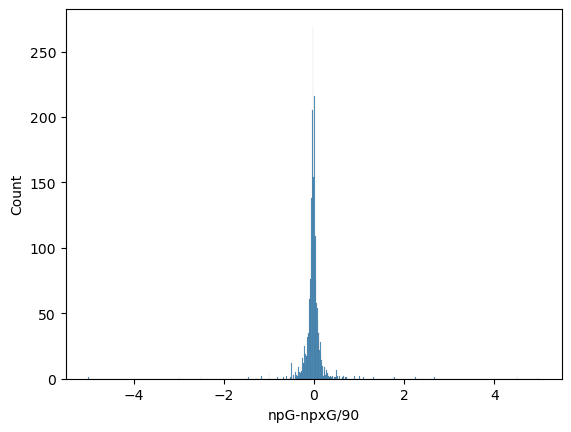

In [18]:
# Feature Engineering
# add npG-npxG / 90
# represent xG differential per game
df['npG-npxG/90'] = df['npG-npxG'] / df['90s']
df.head(10)
df.describe()
sns.histplot(df['npG-npxG/90'])

In [19]:
# Selecting from df to get players who meet criteria

# Using a 'join' (merge in python) just to show how it could be done
# For each filter criterion, create a DF that has been filtered on it
goals_over_10 = df[df['G'] > 10]
xG_over_10 = df[df['xG'] > 10]
nineties_over_15 = df[df['90s'] > 15]
# Perform inner join to get only players that are present in all the above DFs
# Note right table is only the 'Player' column so that other columns aren't duplicated in the 'finishers' DF
finishers = goals_over_10.merge(xG_over_10['Player'], how='inner', on='Player')
finishers = finishers.merge(nineties_over_15['Player'], how='inner', on='Player')
# validation of the join:
# checking for players that violate the filter criteria (resulting filtered DF should be empty):
finishers[finishers['G'] <= 10]
finishers[finishers['xG'] <= 10]
finishers[finishers['90s'] <= 15]

# Results: Top 10 finishers by npG-npxG/90
finishers.sort_values(by='npG-npxG/90', ascending=False).head(10)

finishers.to_csv('finishers.csv')
# See visualization in repo

In [20]:
# Selecting from df to get players that might fit example scouting criteria:
# --young players (who might increase in value over time)
# --more allowance for players with smaller mins played (which is typical for younger players)
# --more allowance for players with lower scoring stats (which is typical for younger players)
# note: scouting would take into account many, many more criteria that just finishing ability

transfer_targets = df[(df['Age'] < 23) & (df['G'] > 5) & (df['xG'] > 5) & (df['90s'] > 8)]

# Results: top finishers by npG-npxG/90 that might be transfer targets
transfer_targets.sort_values(by='npG-npxG/90', ascending=False).head(10)

,Player,Nation,Squad,Age,90s,G,PK,PKatt,xG,npxG,npxG/sh,G-xG,npG-npxG,npG-npxG/90
1955,Benjamin Šeško,SVN,RB Leipzig,20,17.0,14,0,0,7.7,7.7,0.16,6.3,6.3,0.370588
1597,Michael Olise,FRA,Crystal Palace,21,14.2,10,1,1,5.5,4.7,0.08,4.5,4.3,0.302817
226,Jude Bellingham,ENG,Real Madrid,20,25.7,19,1,1,11.1,10.3,0.17,7.9,7.7,0.299611
217,Maximilian Beier,GER,Hoffenheim,20,26.9,16,0,0,11.4,11.4,0.14,4.6,4.6,0.171004
1423,Georges Mikautadze,GEO,Metz,22,19.4,13,3,3,9.5,7.2,0.13,3.5,2.8,0.144330
529,Charles De Ketelaere,BEL,Atalanta,22,22.5,10,1,1,7.1,6.3,0.14,2.9,2.7,0.120000
174,Mohamed Bamba,CIV,Lorient,21,12.6,8,1,1,6.4,5.6,0.16,1.6,1.4,0.111111
1507,Jamal Musiala,GER,Bayern Munich,20,19.5,10,0,0,7.9,7.9,0.14,2.1,2.1,0.107692
1140,Mohammed Kudus,GHA,West Ham,22,27.6,8,0,0,5.1,5.1,0.08,2.9,2.9,0.105072
953,Rasmus Højlund,DEN,Manchester Utd,20,24.0,10,0,0,7.6,7.6,0.20,2.4,2.4,0.100000


In [21]:
# Further analysis
# --Assess PSxG - xG (or PSxG/sh vs. xG/sh) to determine value added by the player
# ----Note: PS ('post-shot') refers to the xG calculated once the trajectory of the shot is known (i.e. immediately after
# ----the ball leaves the foot of the player) as opposed to xG which ignores that info
# --Combine data from multiple seasons to better account for single-season variance
# --Perform similar analysis on other performance metrics: passing, change creation, duels, defensive actions, etc.
